Imports

In [63]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_vgg19
from IPython.core.display import display
from keras.applications.vgg19 import VGG19

Constants

In [4]:
FILE_1 = '01 Umbrella.jpg'
FILE_2 = '02 Couple.jpg'
FILE_3 = '03 Ocean.jpg'

Pre Processing Images

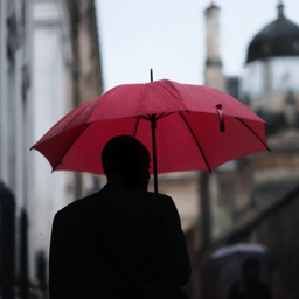

In [21]:
pic = load_img(FILE_1, target_size=(299,299))

display(pic)

In [30]:
pic_array = img_to_array(pic) 
pic_array.shape
expanded = np.expand_dims(pic_array,axis=0)
expanded.shape

(1, 299, 299, 3)

In [31]:
preprocessed = preprocess_input(expanded)

In [32]:
# Load inception resnet

In [33]:
%%time 
inception_model = InceptionResNetV2(weights='imagenet')

CPU times: user 6.63 s, sys: 181 ms, total: 6.81 s
Wall time: 9.73 s


In [34]:
inception_model.graph = tf.compat.v1.get_default_graph()

Making Predictions

In [36]:
prediction = inception_model.predict(preprocessed)
decode_predictions(prediction)

1/1 [==============================] - 0s 55ms/step


[[('n04507155', 'umbrella', 0.82924384),
  ('n03792972', 'mountain_tent', 0.0012268255),
  ('n04479046', 'trench_coat', 0.0011062949),
  ('n03788195', 'mosque', 0.0010572333),
  ('n03220513', 'dome', 0.0010310981)]]

In [37]:
def format_img_inceptionresnet(filename):
  pic = load_img(filename, target_size=(299,299))
  pic_array = img_to_array(pic) 
  expanded = np.expand_dims(pic_array,axis=0)
  return preprocess_input(expanded)

In [49]:
def format_img_vgg19(filename):
  pic = load_img(filename, target_size=(224,224))
  pic_array = img_to_array(pic) 
  expanded = np.expand_dims(pic_array,axis=0)
  return preprocess_input(expanded)

In [50]:
data = format_img_inceptionresnet("download.jpeg")
prediction = inception_model.predict(data)
decode_predictions(prediction)


1/1 [==============================] - 0s 82ms/step


[[('n04120489', 'running_shoe', 0.89740074),
  ('n04200800', 'shoe_shop', 0.015985552),
  ('n04133789', 'sandal', 0.0046779932),
  ('n03680355', 'Loafer', 0.002650907),
  ('n03047690', 'clog', 0.0017050708)]]

# Testing the VGG19 Model

In [51]:
# load the mnodel:
%%time
vgg19_model = VGG19()
vgg19_model.graph = tf.compat.v1.get_default_graph()

CPU times: user 1.53 s, sys: 657 ms, total: 2.19 s
Wall time: 2.22 s


In [67]:

testing_data = format_img_vgg19(FILE_2)
pred = vgg19_model.predict(testing_data)
decode_vgg19(pred)

1/1 [==============================] - 0s 20ms/step


[[('n03788365', 'mosquito_net', 0.11087515),
  ('n04209239', 'shower_curtain', 0.021386536),
  ('n15075141', 'toilet_tissue', 0.01665443),
  ('n02804414', 'bassinet', 0.014131146),
  ('n04447861', 'toilet_seat', 0.0126816)]]